<a href="https://colab.research.google.com/github/saurabhk7/Cognitive-Classification-and-Reasoning/blob/Alpha-GPA-Test/Copy_of_preprocessing_encoding_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cognitive Intelligence and Knowledge Based Classification and Reasoning

#### Importing Libraries, basic visualisation and preprocessing

In [1]:
!pip install kmodes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes

In [0]:
#variables
num_clusters = 3
url="https://raw.githubusercontent.com/saurabhk7/Cognitive-Classification-and-Reasoning/master/Feb25_students.csv"

In [0]:
#read data from url into a dataframe
df = pd.read_csv(url)

In [6]:
# Columns and their types
df.dtypes


Timestamp                                                                                                                                           object
Email Address                                                                                                                                       object
College Name?                                                                                                                                       object
Current Branch?                                                                                                                                     object
Current Year?                                                                                                                                       object
What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                    

In [0]:
!pip install --upgrade -q gspread

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())



In [8]:
# Open our new sheet and read some data.
worksheet = gc.open('mapping').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_records()
#print(rows)

# Convert to a DataFrame and render.
#import pandas as pd
mapping_df = pd.DataFrame.from_records(rows)


#mapping_df=pd.read_csv("content/drive/My Drive/BE_project files/mapping").mapping
for feature_name in mapping_df.columns:
    if feature_name=='S No':
        continue
    max_value = mapping_df[feature_name].max()
    min_value = mapping_df[feature_name].min()
    mapping_df[feature_name] = (mapping_df[feature_name] - min_value) / (max_value - min_value)
mapping_df = mapping_df.drop(["S No"], axis=1)
print(mapping_df)

    Aptitude and Logic (A1)  Extra Curricular (A9)  Hardwork (A7)  \
0                       0.0                    0.2       1.000000   
1                       0.6                    0.0       0.000000   
2                       0.4                    0.0       0.181818   
3                       0.4                    0.0       0.090909   
4                       1.0                    1.0       0.272727   
5                       0.0                    0.8       0.272727   
6                       0.3                    1.0       0.272727   
7                       0.6                    0.1       0.000000   
8                       0.0                    0.6       0.000000   
9                       0.0                    0.7       0.000000   
10                      0.0                    0.0       0.000000   
11                      0.0                    0.0       0.090909   
12                      0.0                    0.0       0.000000   
13                      0.0       

In [9]:
w, h = 36, 9
weights = [[0 for x in range(w)] for y in range(h)]
for ind, column in enumerate(mapping_df.columns):
    weights[ind] = mapping_df[column]
print(weights)
#each row is an attribute, and each column is a question its mapped to, eg: weights[0][11] is value of aptitude of question 12 (0-based indexing)

[0     0.0
1     0.6
2     0.4
3     0.4
4     1.0
5     0.0
6     0.3
7     0.6
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.2
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.1
30    0.1
31    0.1
32    0.1
33    0.0
34    0.0
35    0.0
Name: Aptitude and Logic (A1), dtype: float64, 0     0.2
1     0.0
2     0.0
3     0.0
4     1.0
5     0.8
6     1.0
7     0.1
8     0.6
9     0.7
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.1
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.3
28    0.0
29    0.0
30    0.0
31    0.1
32    0.5
33    0.0
34    0.0
35    0.0
Name: Extra Curricular (A9), dtype: float64, 0     1.000000
1     0.000000
2     0.181818
3     0.090909
4     0.272727
5     0.272727
6     0.272727
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.090909
12    0

In [10]:
df.head(100)

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
1,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
2,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
3,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
4,2/14/2019 13:55:50,shreyashnadal@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,8.00,High,Not Participated,No,Yes,...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
5,2/14/2019 13:56:37,sayalichile2017@gmail.com,Pune Institute of Computer Technology,EnTC,Fourth Year,7.60,Average,Not Participated,No,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
6,2/14/2019 13:58:30,madhurapawar10@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.00,Average,Not Participated,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
7,2/14/2019 13:58:42,shaikhf04@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,8.79,Average,Not Participated,No,No,...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
8,2/14/2019 14:00:16,ashtekar.aditya96@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,8.40,Average,Participated and Prepared,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer
9,2/14/2019 14:00:23,bamey2241997@gmail.com,Pune Institute of Computer Technology,EnTC,Fourth Year,8.76,High,Participated and Prepared,Yes,Yes,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer

In [11]:
#Data preprocessing
df.drop_duplicates(subset ="Email Address", keep = 'last', inplace = True) 
df = df.loc[df['College Name?'] == 'Pune Institute of Computer Technology']


#drop first year students
df = df.loc[df['Current Year?'] != 'First Year']


#normalize GPA Branch wise
df_comp = df.loc[df['Current Branch?'] == 'Computer Engineering']
comp_max = df_comp['What is your Grade in College (GPA)?'].max()
print('COMP MAX: ', comp_max)

df_entc = df.loc[df['Current Branch?'] == 'EnTC']
entc_max = df_entc['What is your Grade in College (GPA)?'].max()
entc_max = 9.5
print('ENTC MAX: ', entc_max)

df_it = df.loc[df['Current Branch?'] == 'IT']
it_max = df_it['What is your Grade in College (GPA)?'].max()
print('IT MAX: ', it_max)

min_value = 0

print("Shape:", df.shape)

df.reset_index(drop=True,inplace=True)
print("Shape:", df.shape)

for index, row in df.iterrows():
  #print('index: ', index)
  #print ('row: ', df.iloc[index, df.columns.get_loc('What is your Grade in College (GPA)?')])
  print("Index: ",index)
  old_gpa = df.iloc[index, df.columns.get_loc('What is your Grade in College (GPA)?')]
  if row['Current Branch?'] == 'Computer Engineering':
    #row['What is your Grade in College (GPA)?'] = ((row['What is your Grade in College (GPA)?'] - min_value) / (comp_max - min_value))*10
    df.iloc[index, df.columns.get_loc('What is your Grade in College (GPA)?')] = ((old_gpa - min_value) / (comp_max - min_value))*10
  if row['Current Branch?'] == 'EnTC':
    #row['What is your Grade in College (GPA)?'] = ((row['What is your Grade in College (GPA)?'] - min_value) / (entc_max - min_value))*10 
    df.iloc[index, df.columns.get_loc('What is your Grade in College (GPA)?')] = ((old_gpa - min_value) / (entc_max - min_value))*10 
  if row['Current Branch?'] == 'IT':
    #row['What is your Grade in College (GPA)?'] = ((row['What is your Grade in College (GPA)?'] - min_value) / (it_max - min_value))*10
    df.iloc[index, df.columns.get_loc('What is your Grade in College (GPA)?')] = ((old_gpa - min_value) / (it_max - min_value))*10
  print("Old GPA: ", old_gpa, "New GPA: ", df.iloc[index, df.columns.get_loc('What is your Grade in College (GPA)?')])  

# #dfemail: retains the email id for future mapping
df.loc[-1] = ['2/14/2019 13:39:07','admin','Pune Institute of Computer Technology','Computer Engineering','Fourth Year',9.99,'Average','Not Participated','No','No','No','No','No','No','No',"Job in technical domain (Software Developer, Data Scientist etc.)",'No','No','No - I do NOT ask questions or I prefer to look at the topic on my own','I leave the topic to look at it later on.','I leave the topic and look at during examinations','I learn a topic only to score marks in college/university examination','Short term memorization of syllabus just to spend lesser time','When exams are around the corner by just focusing on the given syllabus','I study topics that are limited to the examination curriculum irrespective of my understanding of the topic','No','No','Yes','Memorize the topic and its contents OR Leave it','Yes','is Apt or Overestimates my knowledge','is Apt or Overestimates my efforts','Delay the project and postpone it to some other time','No/Average performance','No','No','No','No','Do not prefer','Do not prefer','Do not prefer']
df.sort_index(inplace=True)
df.index = df.index + 1  # shifting index
dfemail = df.copy()

df = df.drop(['Timestamp','Email Address','Current Branch?', 'Current Year?'], axis = 1)
df = df.drop(['College Name?'], axis = 1)

COMP MAX:  9.98
ENTC MAX:  9.5
IT MAX:  9.73
Shape: (339, 41)
Shape: (339, 41)
Index:  0
Old GPA:  9.4 New GPA:  9.418837675350701
Index:  1
Old GPA:  9.37 New GPA:  9.38877755511022
Index:  2
Old GPA:  9.2 New GPA:  9.218436873747494
Index:  3
Old GPA:  9.32 New GPA:  9.338677354709418
Index:  4
Old GPA:  8.0 New GPA:  8.016032064128256
Index:  5
Old GPA:  7.6 New GPA:  7.999999999999999
Index:  6
Old GPA:  9.0 New GPA:  9.01803607214429
Index:  7
Old GPA:  8.79 New GPA:  8.80761523046092
Index:  8
Old GPA:  8.4 New GPA:  8.416833667334668
Index:  9
Old GPA:  8.76 New GPA:  9.221052631578948
Index:  10
Old GPA:  8.5 New GPA:  8.517034068136272
Index:  11
Old GPA:  9.05 New GPA:  9.526315789473685
Index:  12
Old GPA:  7.0 New GPA:  7.014028056112224
Index:  13
Old GPA:  8.88 New GPA:  8.897795591182366
Index:  14
Old GPA:  9.5 New GPA:  9.519038076152304
Index:  15
Old GPA:  9.49 New GPA:  9.509018036072144
Index:  16
Old GPA:  8.42 New GPA:  8.863157894736842
Index:  17
Old GPA:  8.32

In [12]:
df.head(100)

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.990000,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.418838,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.388778,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.218437,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.338677,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,8.016032,High,Not Participated,No,Yes,No,No,Yes,No,No,...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
6,8.000000,Average,Not Participated,No,No,No,No,No,No,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
7,9.018036,Average,Not Participated,No,No,Yes,No,No,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
8,8.807615,Average,Not Participated,No,No,Yes,No,No,No,No,...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
9,8.416834,Average,Participated and Prepared,Yes,No,Yes,Yes,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer


In [13]:
# Displays descriptive stats for all columns
df.describe()

,What is your Grade in College (GPA)?
count,340.000000
mean,8.772411
std,0.825068
min,0.000000
25%,8.361723
50%,8.947632
75%,9.281631
max,10.000000


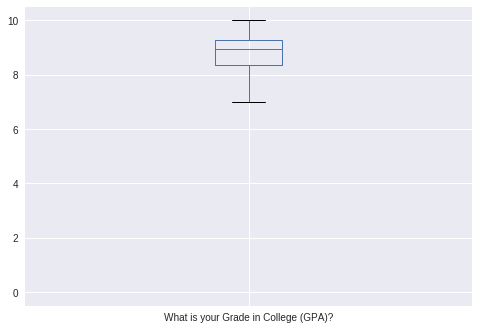

In [14]:
df.plot(kind='box')

In [15]:
df.dtypes

What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                                                                                                  object
Have you prepared for any olympiads/national level competitive examinations in your school days?                                                    object
Have you actively participated in activities like chess or abacus etc?                                                                              object
Have you been "extensively" involved in the following? [Competitive Coding]                                                                         object
Have you been "extensively" involved in the following? [Sodtware Development]                                                                       object
Have you been "extensively" involved in the following? [ML/AI Projects

In [16]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.990000,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.418838,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.388778,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.218437,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.338677,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [0]:
# dataframe to store only categorical attributes
dfcat = df.loc[:, df.columns != 'What is your Grade in College (GPA)?']

In [0]:
# Categorical boolean mask
categorical_feature_mask = dfcat.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dfcat.columns[categorical_feature_mask].tolist()

In [0]:
# instantiate labelencoder object
le = LabelEncoder()

In [20]:
#Display categorical columns in dataframe
dfcat[categorical_cols]

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,High,Not Participated,No,Yes,No,No,Yes,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
6,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
7,Average,Not Participated,No,No,Yes,No,No,No,Yes,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
8,Average,Not Participated,No,No,Yes,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
9,Average,Participated and Prepared,Yes,No,Yes,Yes,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer


In [21]:
# apply le on categorical feature columns
dfcat[categorical_cols] = dfcat[categorical_cols].apply(lambda col: le.fit_transform(col))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [22]:
#Display encoded Categorical values in dataframe
dfcat[categorical_cols].head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,0,1,...,0,0,1,1,1,0,0,1,1,1
2,0,1,0,0,1,1,0,0,0,4,...,0,1,1,1,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,4,...,0,0,1,1,0,1,0,1,1,1
4,0,1,0,1,1,0,1,1,0,4,...,1,1,1,1,1,0,1,1,1,1


In [0]:
#Add a gpa column in categorical dataframe and convert to a categorical bin
dfcat.insert(loc=0, column='GPA', value=df['What is your Grade in College (GPA)?'])
bin = [-1,0,7,7.5,8,8.25,8.5,8.75,9,9.25,9.5,10]
category = pd.cut(dfcat['GPA'],bin)
dfcat.insert(loc=0, column='Binned GPA', value=category)

In [24]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,"(9.5, 10.0]",9.990000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(9.25, 9.5]",9.418838,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,"(9.25, 9.5]",9.388778,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,"(9.0, 9.25]",9.218437,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,"(9.25, 9.5]",9.338677,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,"(8.0, 8.25]",8.016032,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,"(7.5, 8.0]",8.000000,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,"(9.0, 9.25]",9.018036,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,"(8.75, 9.0]",8.807615,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,"(8.25, 8.5]",8.416834,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [25]:
dfcat['Binned GPA'] = dfcat['Binned GPA'].astype('str') 
dfcat['Binned GPA'] = dfcat['Binned GPA'].map({'(-1.0, 0.0]': 0,'(0.0, 7.0]': 0, '(7.0, 7.5]': 1, '(7.5, 8.0]': 2, '(8.0, 8.25]': 3, '(8.25, 8.5]': 4, '(8.5, 8.75]': 5, '(8.75, 9.0]': 6, '(9.0, 9.25]': 7, '(9.25, 9.5]': 8, '(9.5, 10.0]': 9})
dfcat = dfcat.drop(['GPA'], axis = 1)
dfcat.isnull().values.any()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False

### Apply kmodes on the preprocessed data

In [0]:
df_dummy = pd.get_dummies(dfcat)
df_dummy = df_dummy.iloc[1:,:]
dfemail = dfemail.iloc[1:,:]

In [0]:
#dissimilaty matrix for weighted attributes calculation
attribute_index = 0
def ss_attribute(a, b, **_):
    cost = []
#     print("Working on attr: ",attribute_index)
    for i in range(0,len(a)):
        row_cost = 0
        for j in range(0,len(a[i])):
            if(a[i][j]!=b[j]):
                row_cost+=abs(a[i][j]-b[j])*weights[attribute_index][j]
        cost.append(row_cost)
        
    return np.array(cost)

In [28]:
run_elbow = 0

if(run_elbow):
    
    num_init=20
    km = []
    clusters = []
    num_attribute_clusters = 3
    for i in range(0,len(weights)):
        xx=[]
        yy=[]
        for j in range(1,8):            
            attribute_index = i
            kmtemp = KModes(n_clusters=j, init='Huang', n_init=10, verbose=0, cat_dissim=ss_attribute)
            clusterstemp = kmtemp.fit_predict(df_dummy)
            print("Attribute: ",i," Clusters: ",j," n_init: ",10," Best cost: ",kmtemp.cost_)
            xx.append(j)
            yy.append(kmtemp.cost_)
        plt.plot(xx,yy,'go-',label='Cluster vs Cost')
        plt.show()
else:
    km = []
    clusters = []
    #num_attribute_clusters = [4,3,3,4,4,4,4,4,2]
    num_attribute_clusters = [3,3,3,3,3,3,3,3,3]

    
    for i in range(0,len(weights)):
        attribute_index = i
        km.append(KModes(n_clusters=num_attribute_clusters[i], init='Huang', n_init=10, verbose=0, cat_dissim=ss_attribute))
        clusters.append(km[i].fit_predict(df_dummy))
        print("Attribute: ",i," Clusters: ",num_attribute_clusters," n_init: ",10," Best cost: ",km[i].cost_)
    for i in range(0,len(clusters)):
        cluster_name = 'cluster'+str(i)
        df_dummy[cluster_name] = clusters[i]

Attribute:  0  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  265.49999999999994
Attribute:  1  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  527.7999999999994
Attribute:  2  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  961.2727272727271
Attribute:  3  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  1010.8571428571428
Attribute:  4  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  1441.7777777777774
Attribute:  5  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  578.5999999999996
Attribute:  6  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  646.6666666666664
Attribute:  7  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  1140.0909090909088
Attribute:  8  Clusters:  [3, 3, 3, 3, 3, 3, 3, 3, 3]  n_init:  10  Best cost:  1067.1999999999998


In [29]:
df_dummy.head()

,Binned GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,Provide your preference for the following methods of learning [Personalised classroom teaching (human)],cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8
1,8,1,0,0,1,1,0,1,1,0,...,1,2,2,0,2,1,2,1,1,1
2,8,0,1,0,0,1,1,0,0,0,...,1,0,1,0,2,1,2,1,1,1
3,7,0,1,0,0,0,1,0,0,0,...,1,0,0,0,2,1,0,1,1,1
4,8,0,1,0,1,1,0,1,1,0,...,1,2,1,0,2,1,2,1,2,1
5,3,1,0,0,1,0,0,1,0,0,...,0,2,0,1,1,2,1,2,0,0


In [0]:
# #dissimilaty matrix calculation
# def ss(a, b, **_):
#     cost = []
#     for i in range(0,len(a)):
#         row_cost = 0
#         for j in range(0,len(a[i])):
#             if(a[i][j]!=b[j]):
#                 row_cost+=abs(a[i][j]-b[j])
#         cost.append(row_cost)
        
#     return np.array(cost)

#### Algorithm for finding the appropriate number of clusters

In [0]:
# run_elbow = 0

# if(run_elbow):
#     xx=[]
#     yy=[]
#     num_init=20
#     for i in range(1,11):
#         km = KModes(n_clusters=i, init='Huang', n_init=num_init, verbose=0, cat_dissim=ss)
#         clusters = km.fit_predict(df_dummy)
#         print("Clusters: ",i," n_init: ",num_init," Best cost: ",km.cost_)
#         xx.append(i)
#         yy.append(km.cost_)
#     plt.plot(xx,yy,'go-',label='Cluster vs Cost')
#     plt.show()
# else:
#     km = KModes(n_clusters=num_clusters, init='Huang', n_init=40, verbose=0, cat_dissim=ss)
#     clusters = km.fit_predict(df_dummy)
#     print("Clusters: ",num_clusters," n_init: ",40," Best cost: ",km.cost_)
#     df_dummy['clusters'] = clusters

In [0]:
# # Display results of kmodes
def display_emails(i):
    kmodes_labels = km[i].labels_
    print (kmodes_labels)
    arr=[]
    for j in range(0,num_attribute_clusters[i]):
        arr.append([])
    for j in range(0, len(kmodes_labels)):
        arr[kmodes_labels[j]].append((dfemail.iloc[j])["Email Address"])
    for j in range(0,num_attribute_clusters[i]):
        print("Cluster ",j," :",arr[j])
        print()

In [0]:
def display_plots(i):
    # # Principal Component Analysis for dimentionality reduction
    pca = PCA(2)
    cluster_name = 'cluster'+str(i)
    # Turn the dummified df into two columns with PCA
    plot_columns = pca.fit_transform(df_dummy.iloc[:,:-9])

    # Plot based on the two dimensions, and shade by cluster label
    plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy[cluster_name])
    plt.title(cluster_name)
    plt.show()


In [34]:
for i in range(0,9):
    display_emails(i)   

[2 0 0 2 2 0 0 0 1 2 2 1 2 2 1 2 1 2 1 1 1 0 1 1 1 1 0 1 2 0 2 2 1 0 1 1 1
 2 0 1 1 0 1 1 1 1 2 1 2 2 1 2 2 1 0 1 2 1 1 1 2 2 1 2 1 2 0 0 1 1 1 1 0 1
 1 0 0 1 2 1 1 1 0 1 1 1 2 1 0 0 1 0 0 1 1 2 1 2 2 2 2 0 1 0 2 1 1 1 1 1 2
 1 2 1 1 1 2 1 1 2 1 0 1 2 0 1 1 0 0 1 2 1 0 1 2 1 1 1 1 2 1 1 2 2 2 1 2 1
 1 1 0 1 1 2 0 2 0 1 1 0 2 1 1 1 2 2 2 2 0 2 2 1 1 1 2 2 2 0 1 2 0 1 2 0 0
 0 2 2 2 1 1 2 2 1 2 0 1 2 2 2 1 0 0 0 0 0 1 1 2 0 0 0 0 2 2 0 0 1 2 1 0 2
 0 0 2 1 1 2 1 1 0 0 0 1 0 1 2 2 1 1 2 0 1 1 1 1 0 0 2 2 2 2 1 2 2 2 2 0 1
 2 1 1 1 0 1 0 1 2 2 2 2 1 2 2 0 1 1 0 1 2 0 1 1 1 1 1 2 0 2 2 1 2 2 2 2 1
 1 1 2 1 1 1 2 0 2 1 0 0 1 2 2 0 1 1 1 1 2 1 0 2 0 2 1 0 2 1 0 1 0 0 1 1 0
 1 0 0 2 0 2]
Cluster  0  : ['saurabhkshirsagar35@gmail.com', 'mahak.bansal97@gmail.com', 'sayalichile2017@gmail.com', 'madhurapawar10@gmail.com', 'shaikhf04@gmail.com', 'juhishelar@gmail.com', 'chetanshinde2001@gmail.com', 'ayushgupta.gupta90@gmail.com', 'sukhadj1998@gmail.com', 'madhuraavachat31@gmail.com', 'tanvideshpand

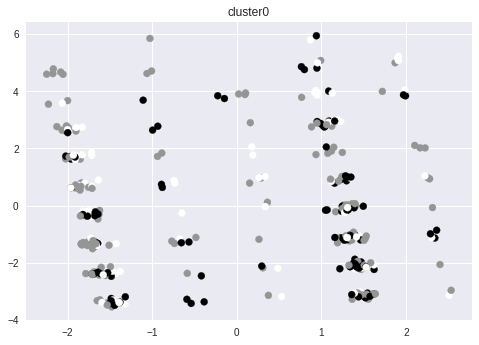

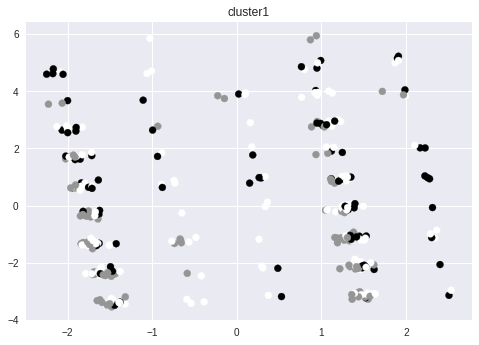

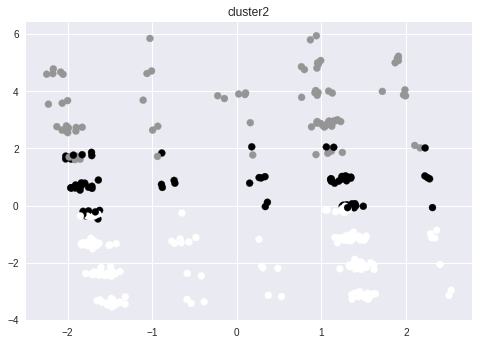

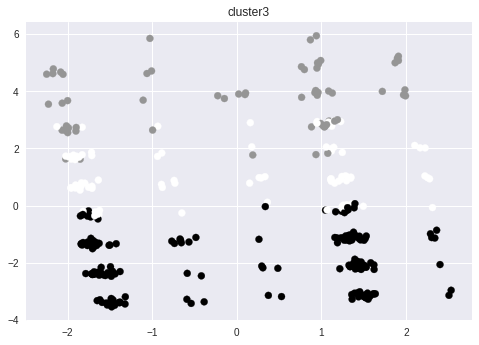

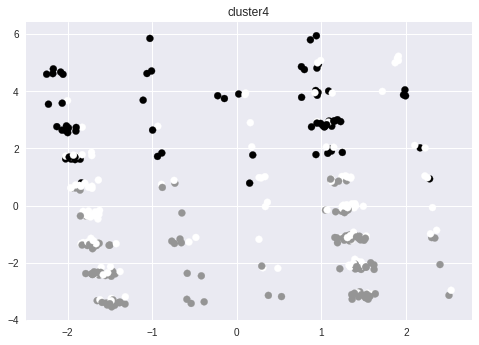

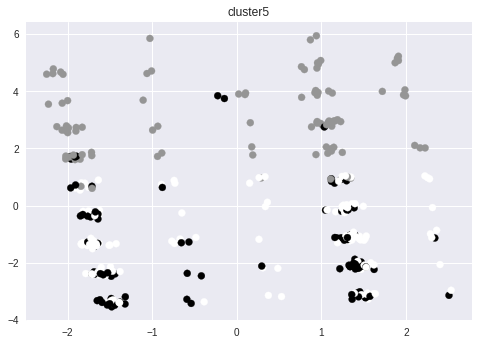

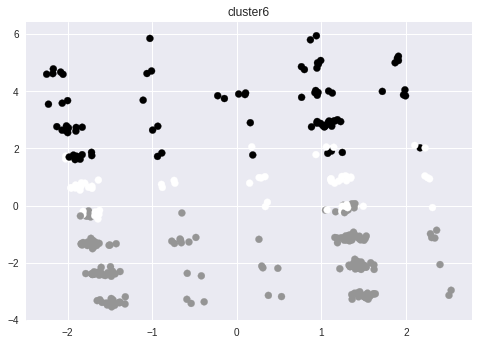

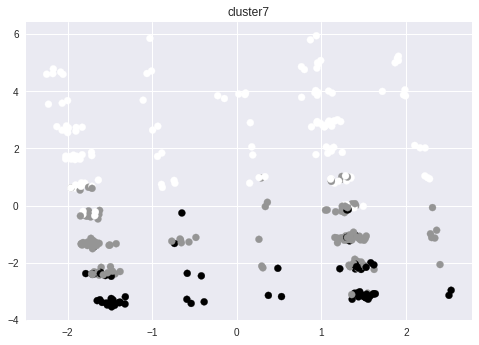

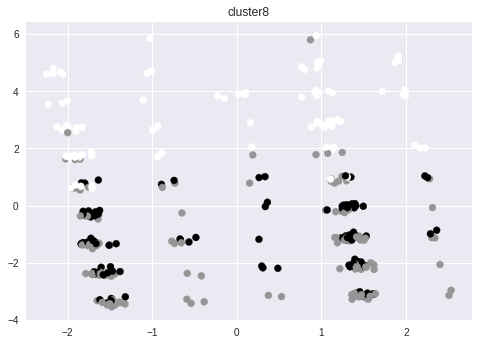

In [35]:
for i in range(0,9):
    display_plots(i)

In [0]:
# # Heatmap for feature weightage visualisation

# categorical_cols.insert(0,'Binned GPA')
# plt.matshow(pca.components_,cmap='viridis')
# plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
# plt.colorbar()
# plt.xticks(range(len(categorical_cols)),categorical_cols,rotation=65,ha='left')
# plt.show()

In [0]:
# # printing positive attributes of  each cluster 

# kmodescent = km.cluster_centroids_
# shape = kmodescent.shape
# # For each cluster mode (a vector of "1" and "0")
# # find and print the column headings where "1" appears.
# # If no "1" appears, assign to "no-skills" cluster.
# print (shape[0])
# for i in range(shape[0]):
#     if sum(kmodescent[i,:]) == 0:
#         print("\ncluster " + str(i) + ": ")
#         print("no-skills cluster")
#     else:
#         print("\ncluster " + str(i) + ": ")
#         cent = kmodescent[i,:]
#         for j in df_dummy.columns[np.nonzero(cent)]:
#             print(j)